## <center>Importing Modules</center>


In [1]:
import pandas as pd
import zipfile as zf
import matplotlib.pyplot as plt

## <center>Opening the ZIP File</center>

In [2]:
# Open the ZIP file
with zf.ZipFile('Employee+Survey+Responses.zip', 'r') as zip_file:
    # List all files in the zip
    file_names = zip_file.namelist()
    
    # Filter out files with .xlsx or .xls extensions
    excel_files = [file for file in file_names if file.endswith(('.xlsx', '.xls'))]
    
    # Extract only .xlsx or .xls files
    for file in excel_files:
        zip_file.extract(file)

## <center>Data Description</center>

In [3]:
main_data = pd.read_excel("HR Employee Survey Responses.xlsx", sheet_name=0)
main_data.head()

,Response ID,Status,Department,Director,Manager,Supervisor,Staff,Question,Response,Response Text
0,1,Complete,Human Resources,0,1,0,0,1. I know what is expected of me at work,4.0,Strongly Agree
1,2,Complete,Communications Office,0,0,0,0,1. I know what is expected of me at work,4.0,Strongly Agree
2,3,Complete,Parks and Recreation,0,1,0,0,1. I know what is expected of me at work,0.0,Not Applicable
3,4,Complete,Human Resources,0,1,0,0,1. I know what is expected of me at work,3.0,Agree
4,5,Complete,Communications Office,0,0,0,0,1. I know what is expected of me at work,0.0,Not Applicable


In [4]:
# No. of null values in a dataset
main_data.isnull().sum()

Response ID        0
Status             0
Department         0
Director           0
Manager            0
Supervisor         0
Staff              0
Question           0
Response         135
Response Text    135
dtype: int64

In [5]:
# No. of duplicated values in a dataset
dupl_counts = main_data.apply(lambda col: col.duplicated().sum())
dupl_counts

Response ID         15
Status           14723
Department       14704
Director         14723
Manager          14723
Supervisor       14723
Staff            14723
Question         14713
Response         14719
Response Text    14719
dtype: int64

In [6]:
# Information about the dataset
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14725 entries, 0 to 14724
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Response ID    14725 non-null  int64  
 1   Status         14725 non-null  object 
 2   Department     14725 non-null  object 
 3   Director       14725 non-null  int64  
 4   Manager        14725 non-null  int64  
 5   Supervisor     14725 non-null  int64  
 6   Staff          14725 non-null  int64  
 7   Question       14725 non-null  object 
 8   Response       14590 non-null  float64
 9   Response Text  14590 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 1.1+ MB


## <center>A. Data Profiling & Quality</center>

In [7]:
# Calculate the minimum, maximum, count, and number of blanks for each numerical field.
# Select numerical columns (int64 and float64 types)
numerical_columns = main_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate min, max, count, and number of blanks for each numerical column
summary_stats = main_data[numerical_columns].agg(['min', 'max', 'count']).T

# Add number of blanks (nulls) for each column
summary_stats['blanks'] = main_data[numerical_columns].isnull().sum()

# Convert the columns to integers
summary_stats = summary_stats.astype(int)

summary_stats

,min,max,count,blanks
Response ID,1,14710,14725,0
Director,0,1,14725,0
Manager,0,1,14725,0
Supervisor,0,1,14725,0
Staff,0,1,14725,0
Response,0,4,14590,135


In [8]:
# Remove any records with blank responses
main_data = main_data[main_data['Status'] != 'Incomplete']
main_data.isnull().sum()

Response ID      0
Status           0
Department       0
Director         0
Manager          0
Supervisor       0
Staff            0
Question         0
Response         0
Response Text    0
dtype: int64

In [9]:
# Let's check the duplicate values.
dupl_counts = main_data.apply(lambda col: col.duplicated().sum())
dupl_counts

Response ID         15
Status           14589
Department       14569
Director         14588
Manager          14588
Supervisor       14588
Staff            14588
Question         14578
Response         14585
Response Text    14585
dtype: int64

In [10]:
# Remove any records containing duplicate values across all fields
main_data = main_data.drop_duplicates().reset_index(drop=True)
main_data

,Response ID,Status,Department,Director,Manager,Supervisor,Staff,Question,Response,Response Text
0,1,Complete,Human Resources,0,1,0,0,1. I know what is expected of me at work,4.0,Strongly Agree
1,2,Complete,Communications Office,0,0,0,0,1. I know what is expected of me at work,4.0,Strongly Agree
2,3,Complete,Parks and Recreation,0,1,0,0,1. I know what is expected of me at work,0.0,Not Applicable
3,4,Complete,Human Resources,0,1,0,0,1. I know what is expected of me at work,3.0,Agree
4,5,Complete,Communications Office,0,0,0,0,1. I know what is expected of me at work,0.0,Not Applicable
...,...,...,...,...,...,...,...,...,...,...
14570,14706,Complete,Planning and Public Works,0,0,1,0,10. Overall I am satisfied with my job,4.0,Strongly Agree
14571,14707,Complete,Sheriff's Department,0,0,0,0,10. Overall I am satisfied with my job,3.0,Agree
14572,14708,Complete,District Court,0,0,0,0,10. Overall I am satisfied with my job,4.0,Strongly Agree
14573,14709,Complete,Human Services,0,0,0,0,10. Overall I am satisfied with my job,4.0,Strongly Agree


In [11]:
# Calculate the count or frequency of each value in the Department and Question fields, and standardize any inconsistencies you find.
department_counts = main_data['Department'].value_counts()
question_counts = main_data['Question'].value_counts()

print("Department Counts:\n", department_counts)
print("\nQuestion Counts:\n", question_counts)

Department Counts:
 Department
Planning and Public Works             4663
Sheriff's Department                  1800
Prosecuting Attorney's Office         1172
Finance and Performance Management    1088
Human Services                         959
Juvenile Court                         742
Parks and Recreation                   550
Facilities Management                  472
Assessor-Treasurer's Office            426
District Court                         418
Clerk of Superior Court                358
Superior Court                         347
Human Resources                        269
Council's Office                       267
Exec Office & Directors                263
Communications Office                  196
Emergency Management                   188
Assigned Council                       180
Medical Examiner                       109
Economic Development                    69
Family Justice Center                   39
Name: count, dtype: int64

Question Counts:
 Question
2. At work, 

In [12]:
main_data['Question'] = main_data['Question'].str.replace('&', 'and', regex=False).str.strip()
main_data['Question'].value_counts()

Question
10. Overall I am satisfied with my job                                                  1462
2. At work, I have the opportunity to do what I do best every day                       1461
5. The mission or purpose of our organization makes me feel my job is important         1459
8. My supervisor holds employees accountable for performance                            1459
6. I have a best friend at work                                                         1458
9. My department is inclusive and demonstrates support of a diverse workforce           1458
4. My supervisor, or someone at work, seems to care about me as a person                1457
3. In the last seven days, I have received recognition or praise for doing good work    1456
1. I know what is expected of me at work                                                1453
7. This last year, I have had opportunities at work to learn and grow                   1452
Name: count, dtype: int64

## <center>B. Data Visualization</center>

In [13]:
# Generate a unique list of survey questions.
main_data['Question'].unique().tolist()

['1. I know what is expected of me at work',
 '2. At work, I have the opportunity to do what I do best every day',
 '3. In the last seven days, I have received recognition or praise for doing good work',
 '4. My supervisor, or someone at work, seems to care about me as a person',
 '5. The mission or purpose of our organization makes me feel my job is important',
 '6. I have a best friend at work',
 '7. This last year, I have had opportunities at work to learn and grow',
 '8. My supervisor holds employees accountable for performance',
 '9. My department is inclusive and demonstrates support of a diverse workforce',
 '10. Overall I am satisfied with my job']

In [14]:
# For each question, calculate the count of records associated with each response type (1-4) and the average response, excluding zeros and then add new columns to convert the counts into percentages, based on the total responses for 1, 2, 3 or 4.

# 1. Filter out rows where Response is 0
filtered_df = main_data[main_data['Response'] != 0]

# 2. Group by Question and Response and count occurrences
response_counts = (
    filtered_df.groupby(['Question', 'Response'])
    .size()
    .unstack(fill_value=0)  # Unstack to get responses as columns
    .reset_index()  # Reset index for a clean DataFrame
)

# 3. Rename columns for clarity
response_counts.columns.name = None  # Remove the name of the index column
response_counts = response_counts.rename(columns={1: 'Count_1', 2: 'Count_2', 3: 'Count_3', 4: 'Count_4'})

# 4. Calculate average response (excluding zeros)
average_response = (
    filtered_df.groupby('Question')['Response']
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={'Response': 'Average'})
)

# 5. Merge counts and averages
final_summary = pd.merge(response_counts, average_response, on='Question', how='left')

# 6. Calculate total responses for percentage calculation
final_summary['Total_Responses'] = final_summary[['Count_1', 'Count_2', 'Count_3', 'Count_4']].sum(axis=1)

# Calculate percentages for each response type
final_summary['Percentage_1'] = (final_summary['Count_1'] / final_summary['Total_Responses'] * 100).fillna(0)
final_summary['Percentage_2'] = (final_summary['Count_2'] / final_summary['Total_Responses'] * 100).fillna(0)
final_summary['Percentage_3'] = (final_summary['Count_3'] / final_summary['Total_Responses'] * 100).fillna(0)
final_summary['Percentage_4'] = (final_summary['Count_4'] / final_summary['Total_Responses'] * 100).fillna(0)

# Calculate total percentages before rounding
total_percentage = (
    final_summary['Percentage_1'] +
    final_summary['Percentage_2'] +
    final_summary['Percentage_3'] +
    final_summary['Percentage_4']
)

# Round percentages to the nearest integer
final_summary['Percentage_1'] = (final_summary['Percentage_1'] / total_percentage * 100).round(0).fillna(0)
final_summary['Percentage_2'] = (final_summary['Percentage_2'] / total_percentage * 100).round(0).fillna(0)
final_summary['Percentage_3'] = (final_summary['Percentage_3'] / total_percentage * 100).round(0).fillna(0)
final_summary['Percentage_4'] = (final_summary['Percentage_4'] / total_percentage * 100).round(0).fillna(0)

# Drop the 'Total_Responses' column if it's no longer needed
final_summary.drop(columns='Total_Responses', inplace=True)

final_summary

,Question,Count_1,Count_2,Count_3,Count_4,Average,Percentage_1,Percentage_2,Percentage_3,Percentage_4
0,1. I know what is expected of me at work,25,82,495,846,3.49,2.0,6.0,34.0,58.0
1,10. Overall I am satisfied with my job,96,249,635,472,3.02,7.0,17.0,44.0,33.0
2,"2. At work, I have the opportunity to do what ...",67,214,618,548,3.14,5.0,15.0,43.0,38.0
3,"3. In the last seven days, I have received rec...",189,306,522,406,2.80,13.0,22.0,37.0,29.0
4,"4. My supervisor, or someone at work, seems to...",81,115,547,699,3.29,6.0,8.0,38.0,48.0
5,5. The mission or purpose of our organization ...,107,175,582,578,3.13,7.0,12.0,40.0,40.0
6,6. I have a best friend at work,137,469,433,235,2.60,11.0,37.0,34.0,18.0
7,"7. This last year, I have had opportunities at...",120,197,604,493,3.04,8.0,14.0,43.0,35.0
8,8. My supervisor holds employees accountable f...,151,204,632,433,2.95,11.0,14.0,45.0,30.0
9,9. My department is inclusive and demonstrates...,88,149,663,519,3.14,6.0,11.0,47.0,37.0


In [15]:
# Sort the questions descending by average response.
final_summary = final_summary.sort_values(by='Average', ascending=False).reset_index(drop=True)
final_summary

,Question,Count_1,Count_2,Count_3,Count_4,Average,Percentage_1,Percentage_2,Percentage_3,Percentage_4
0,1. I know what is expected of me at work,25,82,495,846,3.49,2.0,6.0,34.0,58.0
1,"4. My supervisor, or someone at work, seems to...",81,115,547,699,3.29,6.0,8.0,38.0,48.0
2,"2. At work, I have the opportunity to do what ...",67,214,618,548,3.14,5.0,15.0,43.0,38.0
3,9. My department is inclusive and demonstrates...,88,149,663,519,3.14,6.0,11.0,47.0,37.0
4,5. The mission or purpose of our organization ...,107,175,582,578,3.13,7.0,12.0,40.0,40.0
5,"7. This last year, I have had opportunities at...",120,197,604,493,3.04,8.0,14.0,43.0,35.0
6,10. Overall I am satisfied with my job,96,249,635,472,3.02,7.0,17.0,44.0,33.0
7,8. My supervisor holds employees accountable f...,151,204,632,433,2.95,11.0,14.0,45.0,30.0
8,"3. In the last seven days, I have received rec...",189,306,522,406,2.80,13.0,22.0,37.0,29.0
9,6. I have a best friend at work,137,469,433,235,2.60,11.0,37.0,34.0,18.0


<Figure size 1200x800 with 0 Axes>

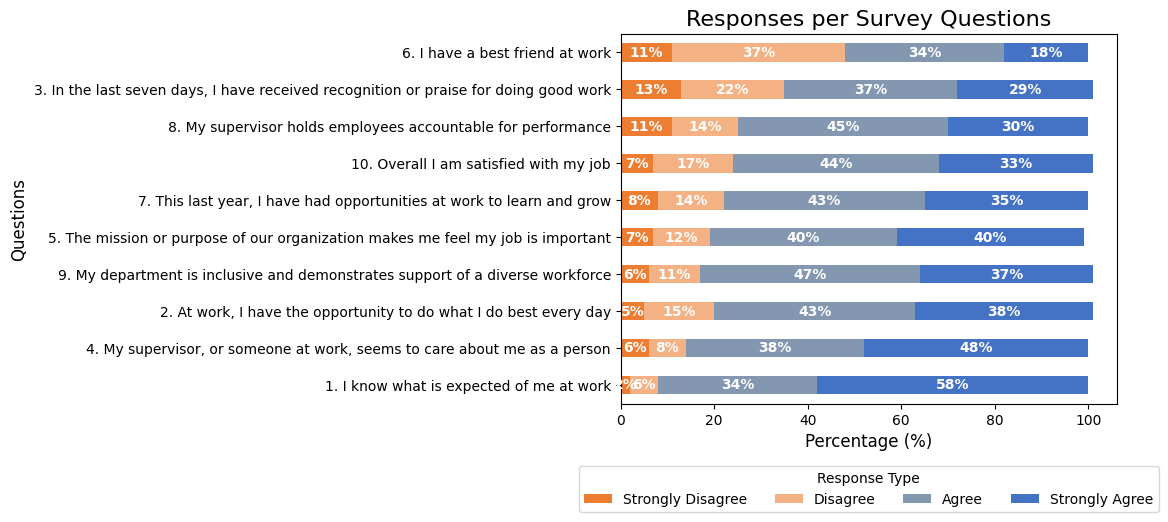

In [17]:
# Prepare data for plotting
plot_data = final_summary[['Question', 'Percentage_1', 'Percentage_2', 'Percentage_3', 'Percentage_4']]

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a 100% stacked horizontal bar chart
colors = ['#ED7D31', '#F4B183', '#8497B0', '#4472C4']  # Color-blind friendly palette
plot_data.set_index('Question').plot(kind='barh', stacked=True, color=colors)

# Set the title and labels
plt.title('Responses per Survey Questions', fontsize=16, loc='center')
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Questions', fontsize=12)

# Add data labels as integers
for index, row in plot_data.iterrows():
    total = row[1:].sum()  # Total of the response percentages
    cumulative_percentage = 0
    for i, percentage in enumerate(row[1:]):
        cumulative_percentage += percentage
        plt.text(cumulative_percentage - percentage / 2, index, f'{int(percentage)}%', va='center', ha='center', color='white', fontweight='bold')

# Position the legend at the bottom
plt.legend(title='Response Type', labels=['Strongly Disagree', 'Disagree', 'Agree', 'Strongly Agree'], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

# Save the plot
plt.savefig('response_percentages_chart.png', bbox_inches='tight')

# Display the plot
plt.show()